# Practical Session 1
## Biomedical Signal and Images
### ETRO: Deparment of Electronics and Informatics
### Vrije Universiteit Brussel

Evgenia Papavasileiou and Jef Vandemeulebroucke


<font color=blue>Students names and IDs: </font> <Br> Sajjad Mahmoudi - 0573106
<font color=blue>Academic Year </font>: 2020-2021

In all the practical sessions of this course we will use python 3 and jupyter notebooks. We will use google´s environment called 'colab'. https://colab.research.google.com .You will only need a gmail. Colab is equipped with most of the libraries 
we will need in this semester. In case a module is not installed, you can install it with 'pip'. 

### Purpose
The purpose of this exercise session is to obtain insight into the basic signal processing concepts; aliasing, Fourier transform and filtering commonly applied in medical signal and image analysis. For more information on these concepts, check the course slides and notes. 

The jupyter notebook should be submitted as the report of each practical session by teams of <b>two </b> students. In colab you should download the notebook in the format \*.ipynb and save it as a pdf version through print->save as pdf. <b>Both</b> the jupyter notebook and the pdf should be uploaded on canvas in a zip file before the deadline. Any report sent after the deadline will not be graded. The <b>deadline</b> for the first report is the 12th of November 2020 at 23.59.

### Required modules

During this practical session, the following libraries will be used:
- numpy
- matplotlib
- scipy

To import any external library, you need to import it using the **import** statement followed by the name of the library.

### Exercise 1: Discrete Fourier Transform

Consider a sine wave signal with frequency f=5Hz and duration Tt=1s. Sample the signal with a sampling frequency fs=256Hz.

Generate the fourier transform, i.e. the spectral decomposition of the signal.

Spectral decomposition is the process by which a signal can be expressed as the sum of sinusoids with different frequencies (spectrum).

Report:
- Plot the sampled signal (use discrete points '*'). You can define the time axis with function https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html 
Be careful <b>not</b> to include the last point of the generated time axis

- Calculate the fourier transform of the discrete signal using functions https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html and plot the magnitude of its fourier transform with the help of function https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fftfreq.html


Do not forget to label the axes accordingly.

*Hint:*
Since we are going to compute a fourier transform in all the exercises of this WPO, it is better to define a function 

e.g def create_fourier_transform(signal,fs):

        .......
        
        return frequencies,fourier_transform


Text(0, 0.5, 'Amplitude')

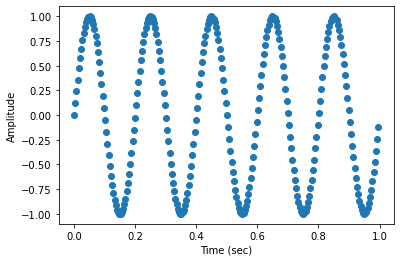

In [76]:
import numpy as np
import matplotlib.pyplot as plt
fs = 256
f = 5
time = np.arange(0, 1, 1/fs)
sinewave = np.sin(2 * np.pi * f * time)
plt.plot(time, sinewave, 'o')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'FFT Magnitude (power)')

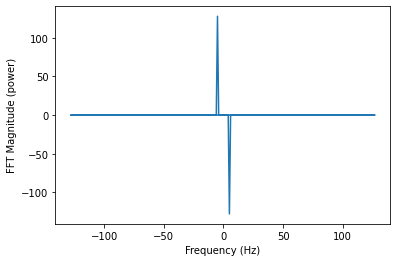

In [81]:
def create_fourier_transform(signal,fs):
  fourier_transform = np.fft.fft(signal)
  frequencies = np.fft.fftfreq(fs, d= 1/fs)
  return frequencies,fourier_transform
x,y = create_fourier_transform(sinewave, fs)
plt.plot( x, y.imag) 
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Magnitude (power)')

From the spectrum analysis of the signal, where do you see the frequency? 

<font color=blue>Your reply here:</font> We can see the power in 5 Hz is very strong as it is expected because of the 5 Hz frequecy of the signal

### Exercise 2: Sampling
Generate a signal with a duration of 1s that consists of the sum of the following harmonics. Each harmonic is given by the equation $ amplitude sin(2 \pi t f) $

- 10 Hz with amplitude 0.3
- 30 Hz with amplitude 0.4
- 50 Hz with amplitude 0.5
- 80 Hz with amplitude 0.2 \
Step 1. Compute the Fourier transform when the frequency spectrum is sampled at 200Hz.\
Step 2 Change the sampling frequency to 100Hz and compute the Fourier transform again.\
Report:
- Plot the signal sampled at the two different sample frequencies( Use a continuous line and not discrete points)
- Plot the two Fourier transforms with the two different sampling frequencies.


Text(0, 0.5, 'Amplitude')

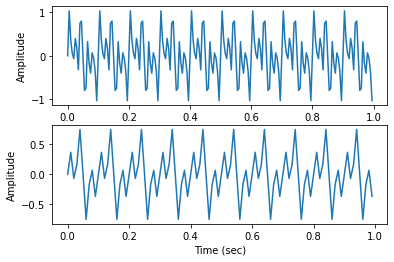

In [82]:
import matplotlib.pyplot as plt
import numpy as np
fs1 = 200
fs2 = 100
time1 = np.linspace(0, 1, fs1, endpoint= False)
time2 = np.linspace(0, 1, fs2, endpoint= False)
amp = [0.3, 0.4, 0.5, 0.2]
f = [10, 30, 50, 80]
signal1 = signal2 = 0
for i in range(len(f)):
  signal1 += amp[i] * np.sin(2 * np.pi * f[i] * time1)
  signal2 += amp[i] * np.sin(2 * np.pi * f[i] * time2)

plt.subplot(211)
plt.plot(time1, signal1)
plt.ylabel('Amplitude')
plt.subplot(212)
plt.plot(time2, signal2)
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Power')

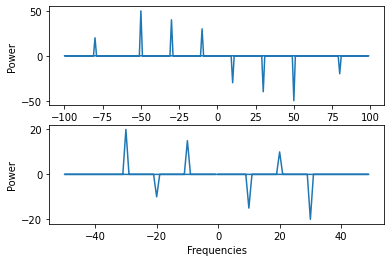

In [85]:

def create_fourier_transform(signal,fs):
  fourier_transform = np.fft.fft(signal)
  frequencies = np.fft.fftfreq(fs, d= 1/fs)
  return frequencies,fourier_transform
x1, y1 = create_fourier_transform(signal1, fs1)
x2, y2 = create_fourier_transform(signal2, fs2)
plt.subplot(211)
plt.plot(x1, y1.imag)
plt.xlabel('Frequencies')
plt.ylabel('Power')
plt.subplot(212)
plt.plot(x2, y2.imag)
plt.xlabel('Frequencies')
plt.ylabel('Power')

Describe what do you observe in the generated spectrums and why.

<font color=blue>Your reply here: </font> The first spectrum with 200 samples is much more accurate and fit to the signal comparing to the second one with 100 samples as the fs2 is not satisfied the nyquist criteria, so subplot(212) misses the frequency 80 Hz.

### Exercise 3: Filtering
Design a filter that filters the signal of the second exercise so that only frequencies 30 and 50 pass. Consider sampling frequency of 200Hz. 
- Design a digital butterworth bandpass filter of 10th order using the signal.butter function from the scipy module.
https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html Change the definitions appropriately! Get the output as output='ba'. You will need the values of a,b in the following step
- Plot the frequency response of the <b>digital</b> filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.freqz.html
- Filter the signal with the designed filter. https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html
- Plot the fourier transform of the filtered signal

Text(0, 0.5, 'Amplitude')

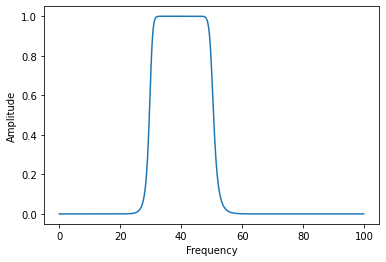

In [87]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np
fs = 200
time = np.linspace(0, 1, fs, endpoint= False)
amp = [0.3, 0.4, 0.5, 0.2]
f = [10, 30, 50, 80]
nyquist = fs/2  # Nyquist, which is sampling rate/2, should be included to normalize the range 
sig = 0
for i in range(len(f)):
  sig += amp[i] * np.sin(2 * np.pi * f[i] * time)
b, a = signal.butter(10, np.array([30,50])/nyquist, btype= 'bandpass', output= 'ba')

w, h = signal.freqz(b, a, fs= 200)
plt.plot(w, abs(h))
plt.xlabel('Frequency')
plt.ylabel('Amplitude')

Text(0, 0.5, 'Power')

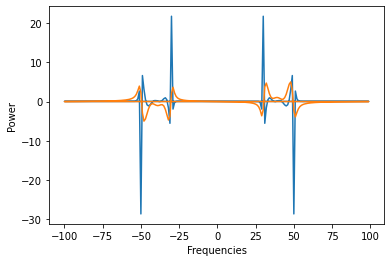

In [89]:
filtered_sig = signal.lfilter(b,a,sig)
def create_fourier_transform(signal,fs):
  fourier_transform = np.fft.fft(signal)
  frequencies = np.fft.fftfreq(fs, d= 1/fs)
  return frequencies,fourier_transform
x, y = create_fourier_transform(filtered_sig, fs)
plt.plot(x, y.real, x, y.imag)
plt.xlabel('Frequencies')
plt.ylabel('Power')

What do you observe in the spectrum of the filtered signal?<br>
<font color=blue> Your reply here: </font> the figure illustrates that almost only the frequencies of the range 30 to 50 have power, and other frequencies are zero as expected because of the filter. It is clear from the figure that applying the filter on the signal makes the real part appeared in the fourier transform plot while the original signal was a sinwave signal. I think, but not sure, the reason why the imaginary part changes a bit comparing to the original signal is the effect of the filter phase responce on the signals generates some new elements with different phases.